In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('auto-mpg.csv')

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
for col in ['cylinders', 'horsepower', 'weight','model year', 'origin', 'car name']:
    print(f'{col}: {df[col].nunique()}')

cylinders: 5
horsepower: 94
weight: 351
model year: 13
origin: 3
car name: 305


In [12]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [14]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df['horsepower'] = df['horsepower'].apply(lambda x: np.nan if x=='?' else int(x))
# df.replace('?',np.NaN, inplace=True)
# # Convert the column to float type
# df['horsepower'] = df['horsepower'].astype(float)

In [16]:
# deal with missing values
df[df.isna().sum(axis=1)!=0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [17]:
# impute missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_imp = imputer.fit_transform(df[['horsepower']])
df['horsepower'] = df_imp

In [18]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
# encode categorical data
df['car name'].value_counts()[:20]

car name
ford pinto                   6
toyota corolla               5
amc matador                  5
ford maverick                5
chevrolet chevette           4
amc gremlin                  4
chevrolet impala             4
peugeot 504                  4
amc hornet                   4
toyota corona                4
ford gran torino             3
chevrolet caprice classic    3
honda civic                  3
volkswagen dasher            3
dodge colt                   3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
ford galaxie 500             3
Name: count, dtype: int64

In [20]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

<Axes: >

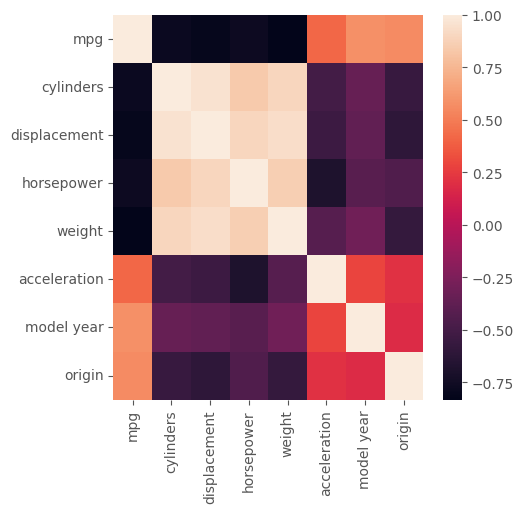

In [23]:
# plot distribution, correlation, pair plot
import seaborn as sns
plt.figure(figsize=(5,5))
num = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin']
sns.heatmap(df[num].corr())

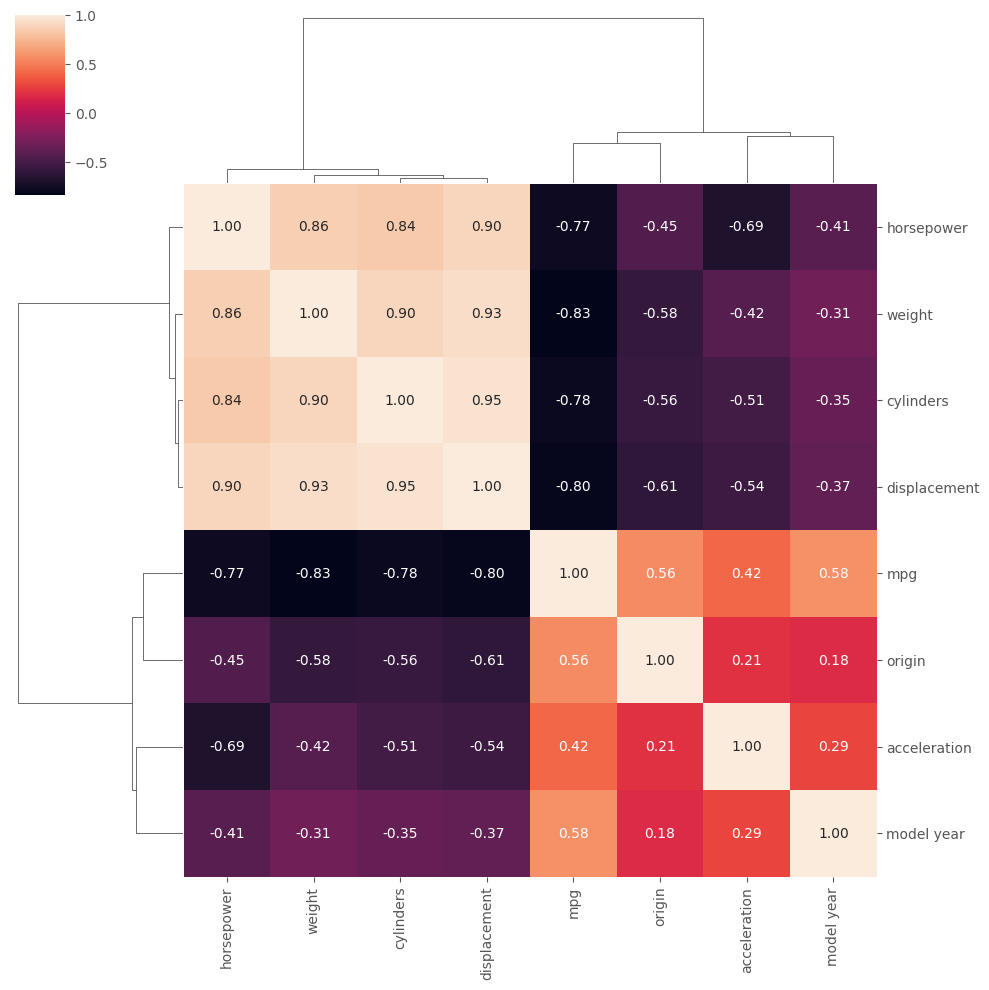

In [24]:
corr_matrix = df[num].corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
# plt.title("Correlation btw feature =s")
plt.show()
# There is a high correlation in the light colored part in the upper left.
# Our target variable, that is, the variable that represents fuel consumption, is proportional to the test variables "horsepower", "weight", "cylinder" and "displacement".

In [26]:
# warning 
import warnings
warnings.filterwarnings('ignore')

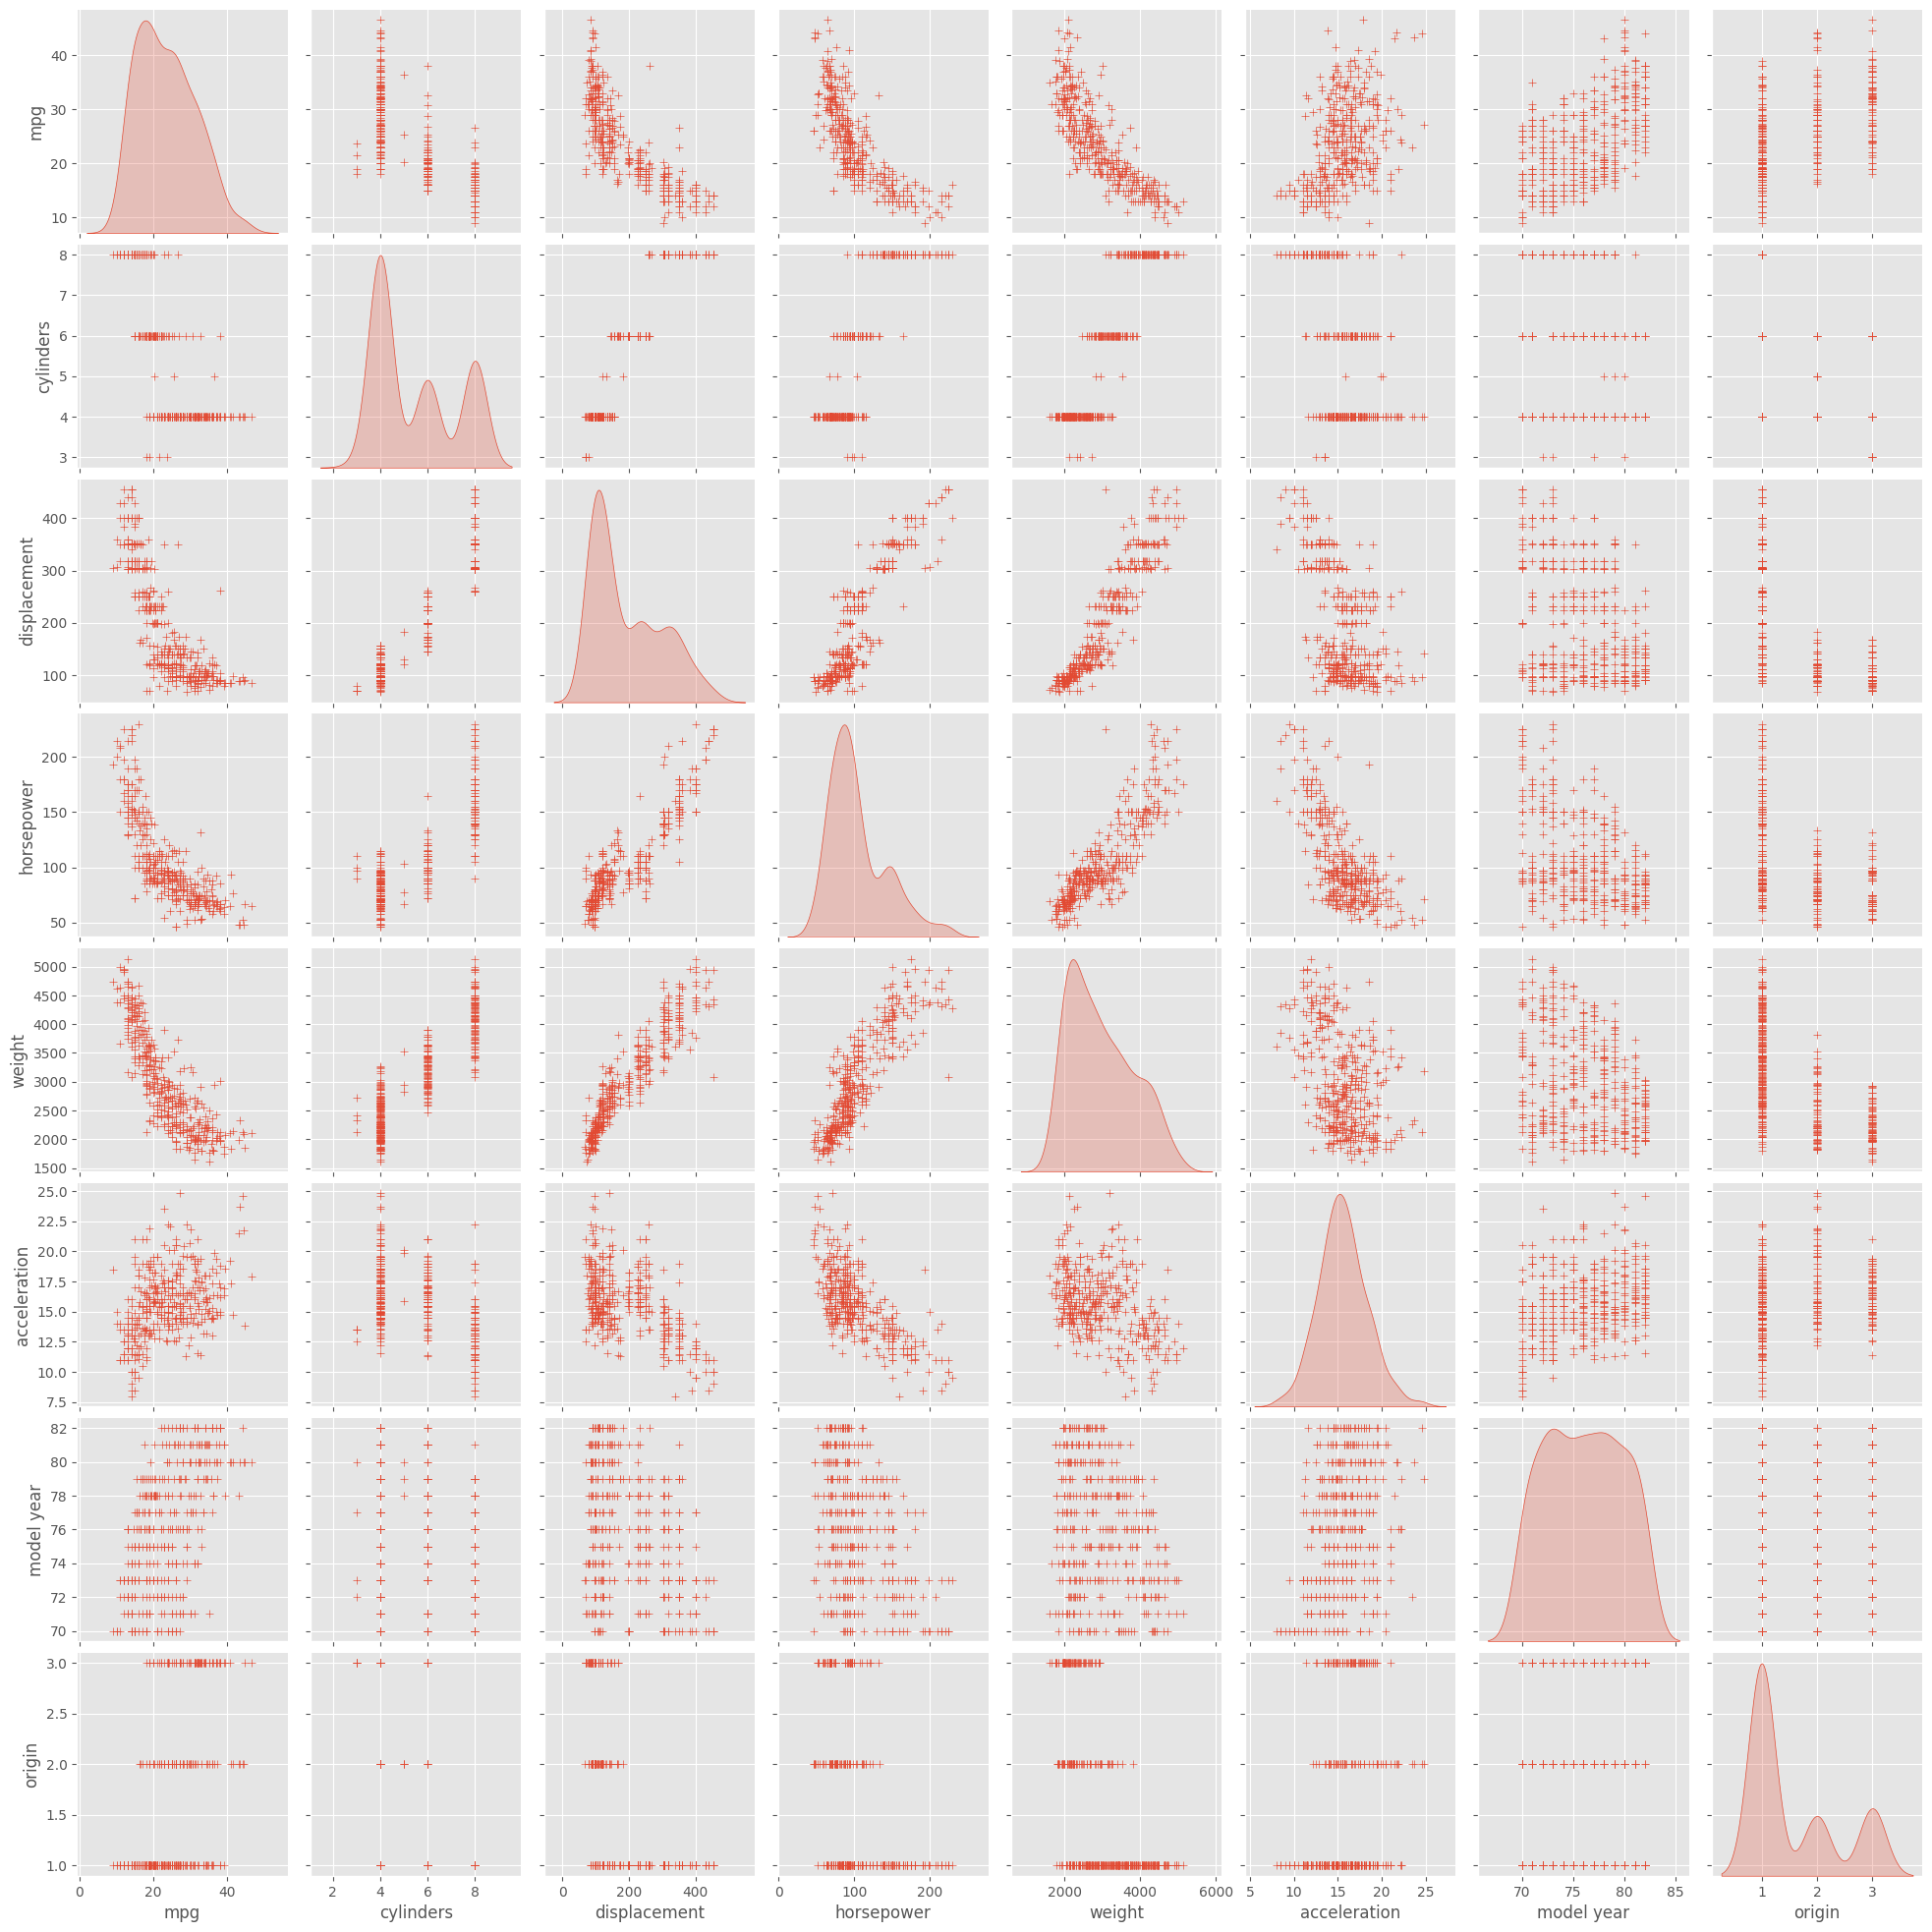

In [27]:
sns.pairplot(df[num], diag_kind = "kde", markers = "+")
plt.show()
# examine distribution, tail? skewed? 
# examine relationship, inverse proportional? linear?
# examine if numerical in fact categorical
# examine outlier

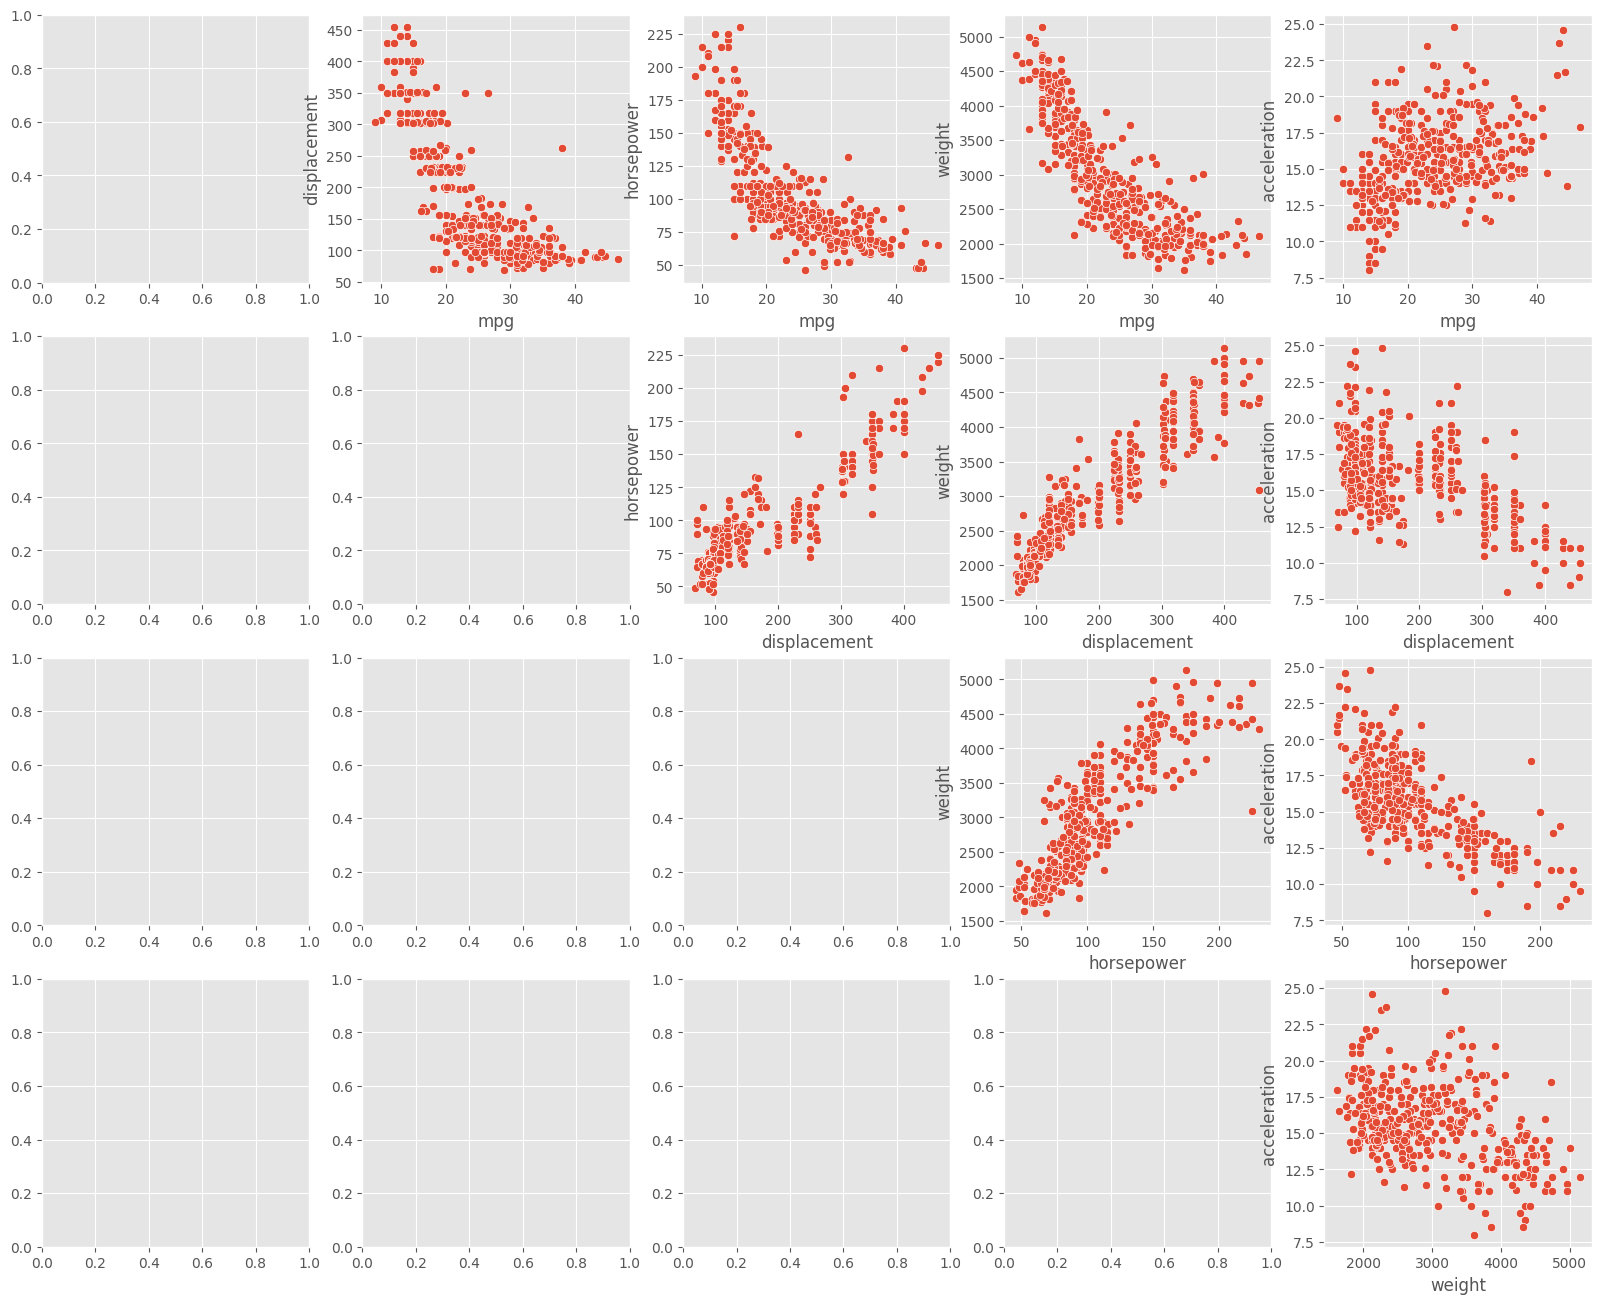

In [28]:
num = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
cat = ['cylinders', 'model year', 'origin']
fig, ax = plt.subplots(4, 5, figsize = (20,16))
for i in range(len(num)-1):
    for j in range(i+1, len(num)):
        sns.scatterplot(x=df[num[i]], y=df[num[j]], ax = ax[i][j])
plt.show()

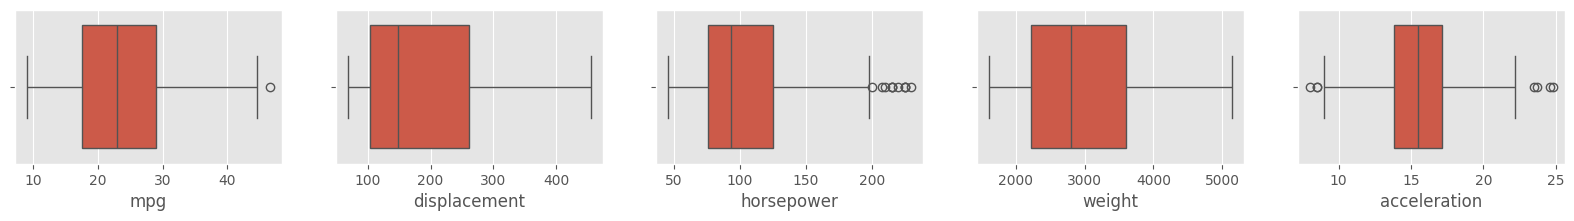

In [29]:
# outliers
fig, ax = plt.subplots(1, len(num), figsize = (20,2))
for i in range(len(num)):
    sns.boxplot(x = df[num[i]], data = df, orient = "v", ax=ax[i])
plt.show()

In [30]:
# detected an outlier in Horsepower and Accelatation, can take them off by removing them using IQR

horsepower_desc = df.describe()['horsepower']
q1_hp = horsepower_desc[4]
q3_hp = horsepower_desc[6]
# Calculate IOR
IQR_hp = q3_hp - q1_hp
thr = 2
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = df["horsepower"] > bottom_limit_hp
filter_hp_top = df["horsepower"] < top_limit_hp 
# this way we discard those above and below the limits
filter_hp = filter_hp_bottom & filter_hp_top # I combined the bottom and top filters
df_filtered = df[filter_hp]
df_filtered


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


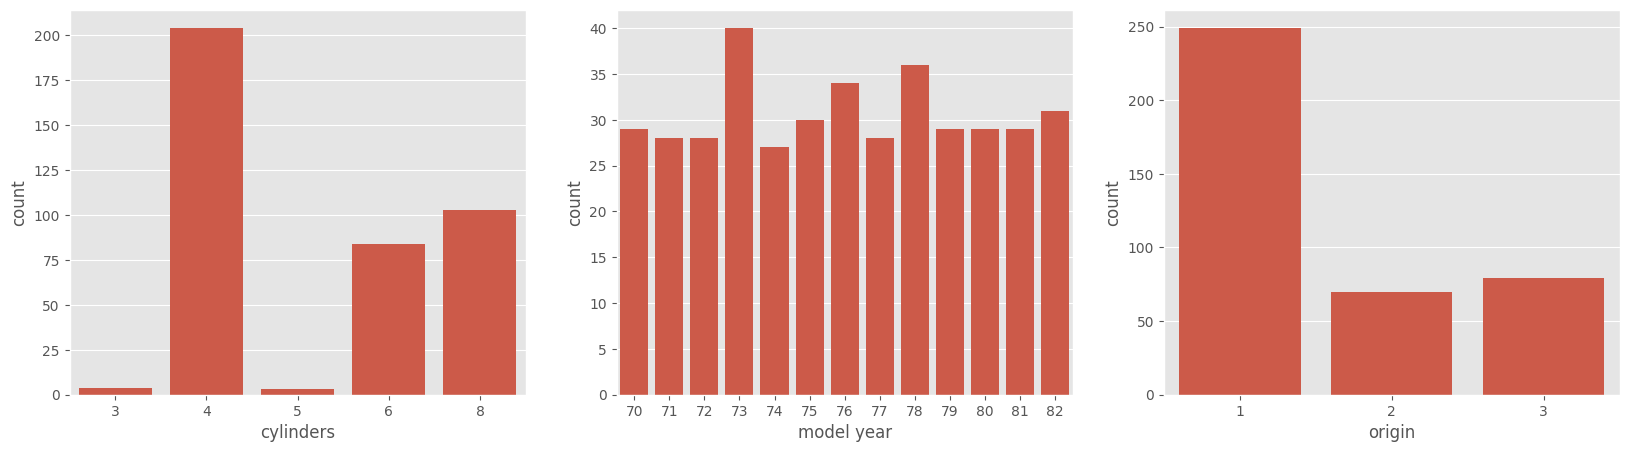

In [31]:
cat = ['cylinders', 'model year', 'origin']
fig, ax = plt.subplots(1,3, figsize=(20,5))
for i in range(3):
    sns.countplot(x=df[cat[i]], data=df, ax=ax[i])
plt.show()
# examine categorical counts, to see if balanced/imbalanced

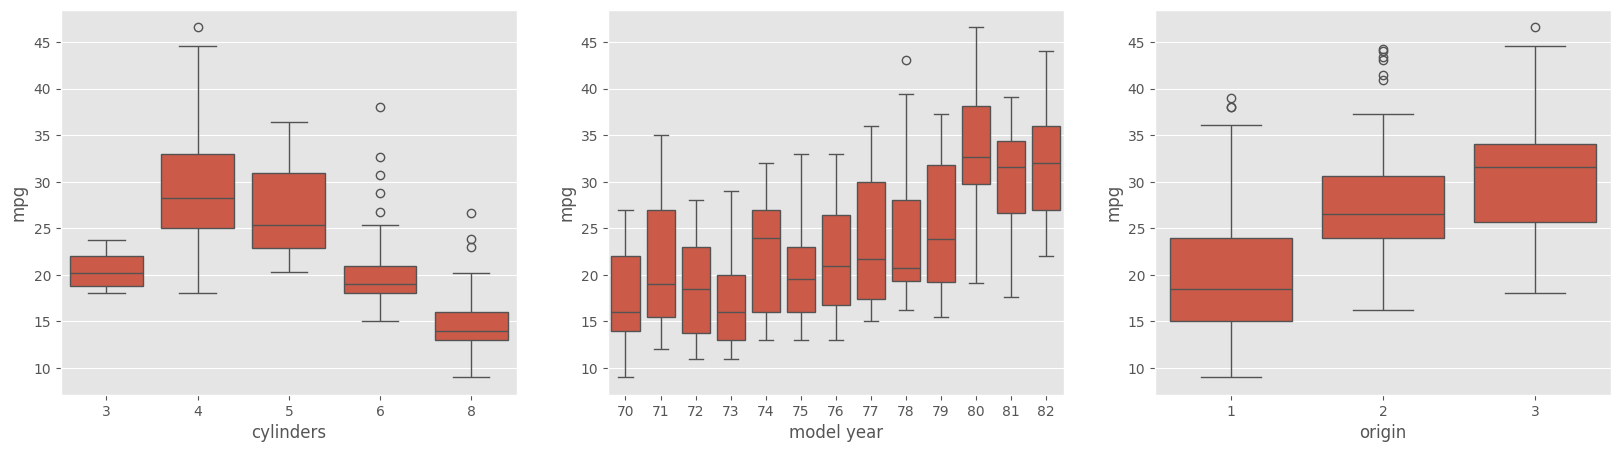

In [32]:
cat = ['cylinders', 'model year', 'origin']
fig, ax = plt.subplots(1,3, figsize=(20,5))
for i in range(3):
    sns.boxplot(x=df[cat[i]], y=df['mpg'], ax = ax[i])
plt.show()

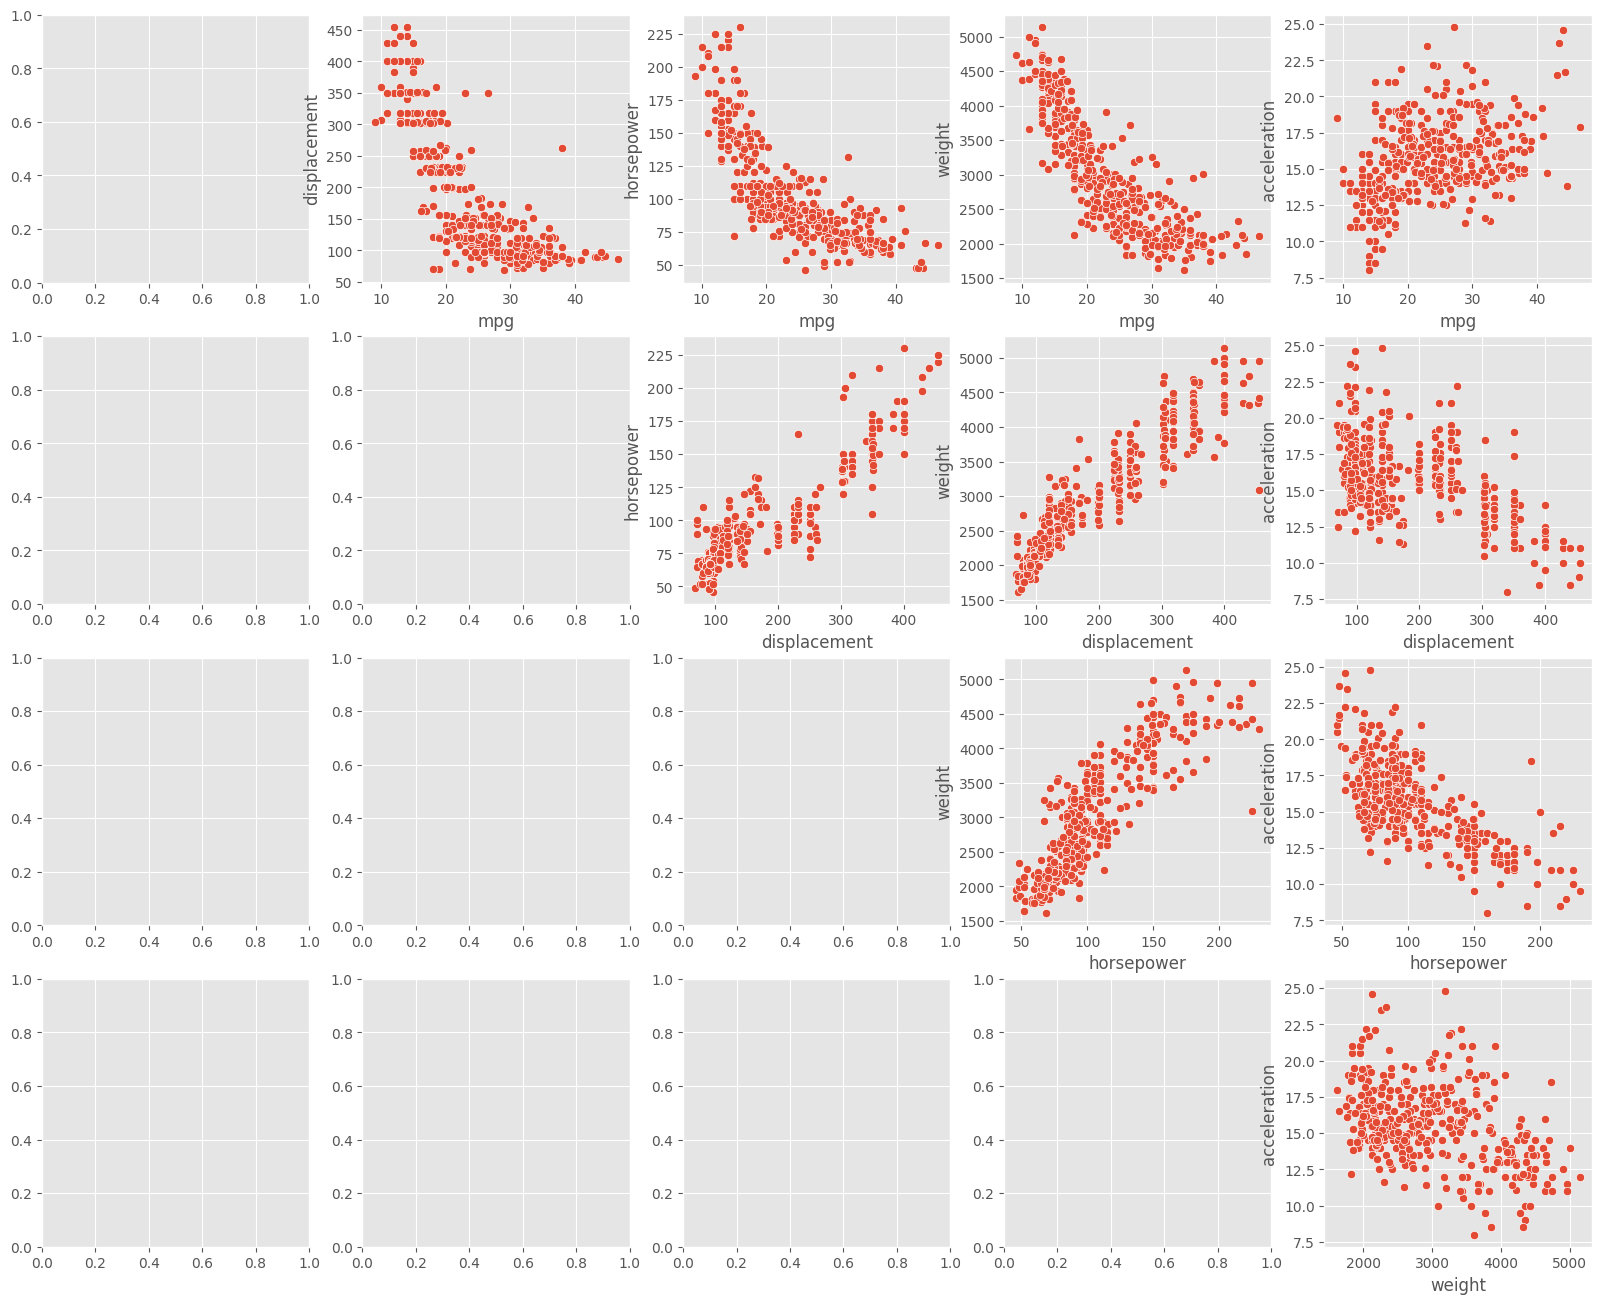

In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
num = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
fig, ax = plt.subplots(4, 5, figsize = (20,16))
for i in range(len(num)-1):
    for j in range(i+1, len(num)):
        sns.scatterplot(x=df[num[i]], y=df[num[j]], ax = ax[i][j])
plt.show()

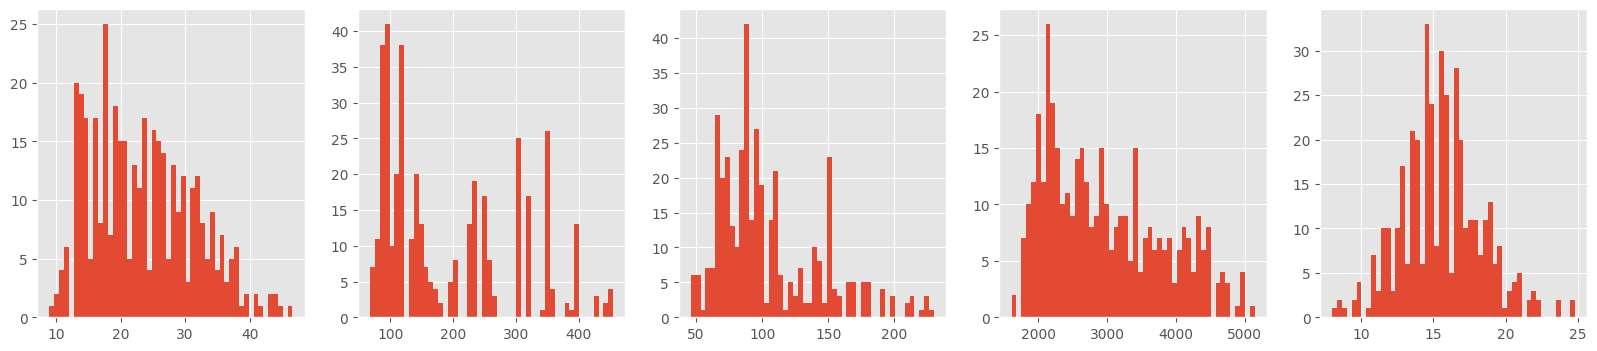

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
num = ['mpg', 'displacement', 'horsepower', 'weight','acceleration']
fig, ax = plt.subplots(1, 5, figsize = (20,4))
for i in range(len(num)):
    ax[i].hist(df[num[i]], bins=50)
plt.show()

In [35]:
from scipy.stats import norm, skew, kurtosis
print(skew(df['mpg']), kurtosis(df['mpg']))

0.45534192556309266 -0.5194245405990445


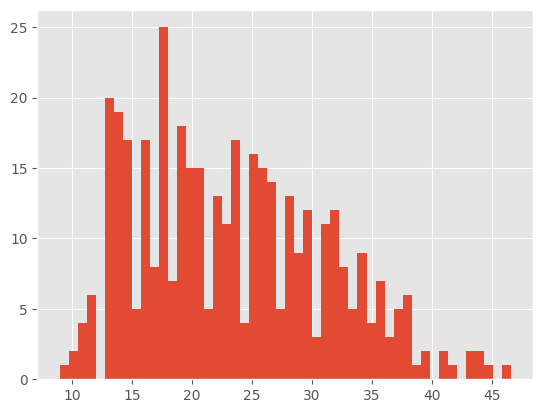

In [36]:
plt.hist(df['mpg'], bins=50)
plt.show()

<Axes: xlabel='mpg', ylabel='Density'>

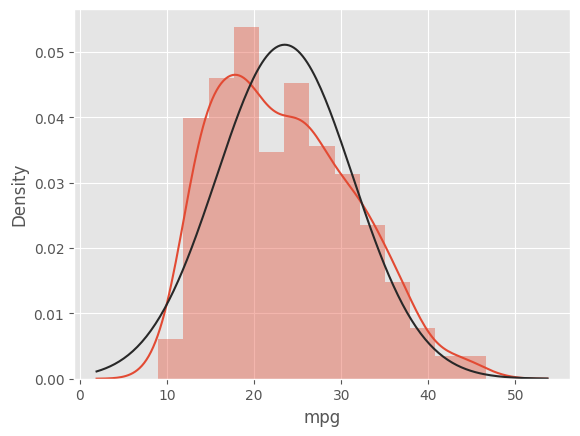

In [37]:
# address skewness: log transformation
sns.distplot(df.mpg, fit = norm)

In [38]:
(mu, sigma) = norm.fit(df.mpg)
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 23.514572864321607, sigma = 7.806159061274433


In [44]:
# goodness of fit test for normality
# ??

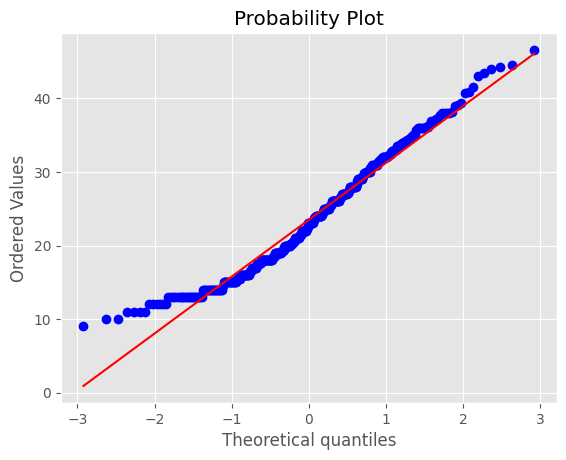

In [40]:
# qq plot --> quantile-quantile plot
# QQ plot -> is a graphical tool used to visually evaluate how well a data set conforms to a normal distribution or how close it is to another theoretical distribution.
from scipy import stats

plt.figure()
stats.probplot(df.mpg, plot = plt)
plt.show()
# Comment:
# Ordered Values --> Quantiles of Our Data
# Theoretical quantiles -> quantiles of normal distribution
# If our data were perfectly placed on the red line, we would say that it has a normal distribution, but it did not fit, especially in the head and tail part, which lost its normality.

<Axes: xlabel='log_mpg', ylabel='Density'>

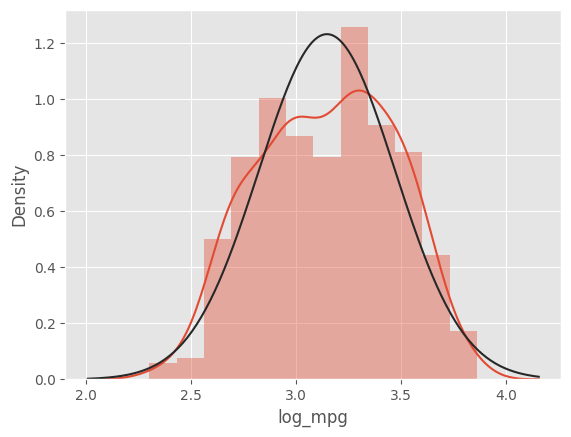

In [41]:
# Log transformation
df["log_mpg"] = np.log1p(df["mpg"]) 
plt.figure()
sns.distplot(df["log_mpg"], fit = norm)

In [42]:
# skewness values of the independent variables.

skewed_feats = df[num].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])


# # Since we corrected our target data, skewness is almost zero.
# # - There is no value less than 1, meaning there is no negative skewness
# # There is horsepower greater than 1 + -> 1.067743, which means there is positive skewness, but since the number 1.067743 is very close to 1, we can ignore it.
# # We can fix skewness features with the Box Cox Transformation method.
# transformed_data, best_lambda = stats.boxcox(df['horsepower'])

mpg: 
mu(mean): 4.298727510042079, 
sigma(std): 0.6242036194584356


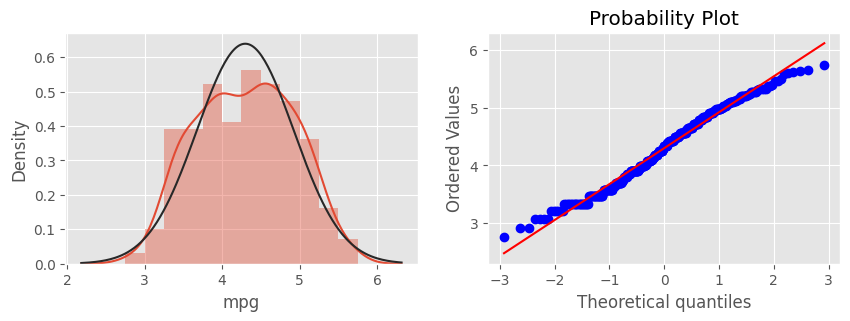

displacement: 
mu(mean): 2.570714123067311, 
sigma(std): 0.1088544568513632


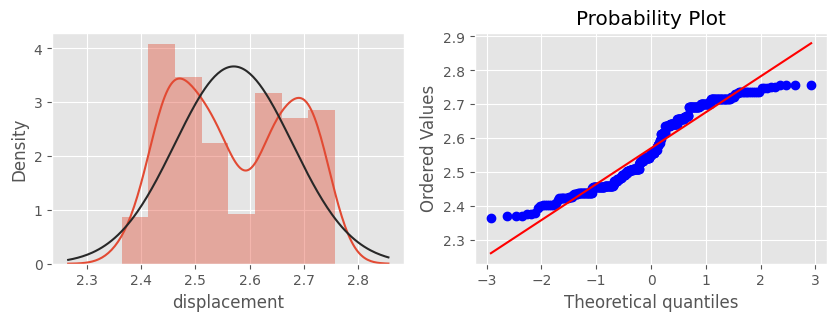

horsepower: 
mu(mean): 1.907623435608845, 
sigma(std): 0.040685848781300576


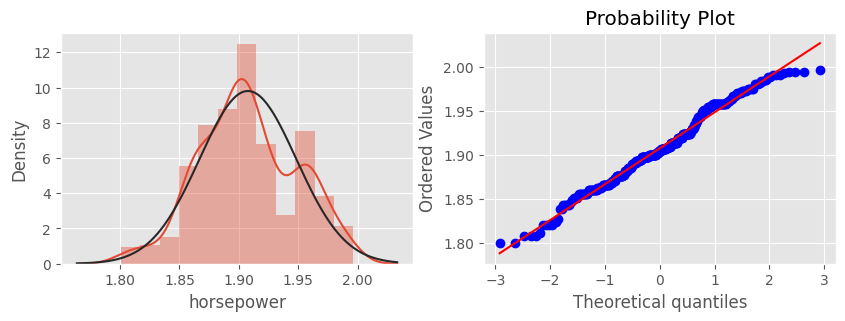

weight: 
mu(mean): 2.8339911277833063, 
sigma(std): 0.020791614422182636


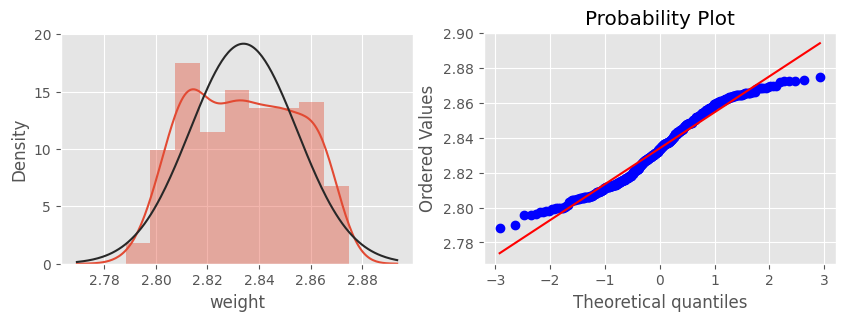

In [112]:
from scipy import stats                                                                      

skewed_boxcox = df[['mpg', 'displacement', 'horsepower', 'weight']].apply(lambda x: stats.boxcox(x)[0])
skewed_boxcox
skewed = skewed_boxcox.apply(lambda x: pd.Series.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewed"])
skewness
for i in skewed_boxcox.columns:
    (mu, sigma) = norm.fit(skewed_boxcox[i])
    print(f"{i}: \nmu(mean): {mu}, \nsigma(std): {sigma}")
    plt.figure(figsize = (10,3))
    plt.subplot(121)
    sns.distplot(skewed_boxcox[i], fit = norm)
    plt.subplot(122)
    stats.probplot(skewed_boxcox[i], plot = plt)
    plt.show()

In [45]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

mpg: 129
cylinders: 5
displacement: 82
horsepower: 94
weight: 351
acceleration: 95
model year: 13
origin: 3
car name: 305
log_mpg: 129


In [ ]:
# without categorical data


In [46]:
# change cylinders, origin, model year as categorical: one-hot encoding
df_dum = pd.get_dummies(df, columns=['cylinders', 'origin', 'model year'])
df_dum.head()

,mpg,displacement,horsepower,weight,acceleration,car name,log_mpg,cylinders_3,cylinders_4,cylinders_5,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130.0,3504,12.0,chevrolet chevelle malibu,2.944439,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165.0,3693,11.5,buick skylark 320,2.772589,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150.0,3436,11.0,plymouth satellite,2.944439,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,304.0,150.0,3433,12.0,amc rebel sst,2.833213,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140.0,3449,10.5,ford torino,2.890372,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# split data
from sklearn.model_selection import train_test_split
X = df_dum.drop(['mpg', 'car name'], axis=1)
y = df_dum['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=49)

In [48]:
# Standardization
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = StandardScaler() # RobustScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# linear regression (sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

print(f'R-sq: {reg.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9814537418014465
rmse: 1.2315493289116588


MAE measures the average of the absolute differences between actual fuel consumption values and those predicted by the model. This metric helps you assess how far the predicted fuel consumption values are from the actual values. A lower MAE indicates a better model performance.

MSE measures the average of the squared differences between actual fuel consumption values and those predicted by the model. MSE further emphasizes the magnitude of errors and is a metric where large errors have more weight.

Which metric we prefer depends on what is more important for fuel prediction in your data set. If we care about the magnitude of the errors, we can use MSE. However, MAE is considered a more balanced metric and focuses on the absolute values of the errors. Therefore, it is often one of the preferred metrics.

In [50]:
# linear regression (statsmodel)
import statsmodels.api as sm
mod = sm.OLS(y_train, sm.add_constant(X_train.astype(float)))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     630.4
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          1.63e-222
Time:                        11:13:09   Log-Likelihood:                -427.72
No. Observations:                 298   AIC:                             903.4
Df Residuals:                     274   BIC:                             992.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2326      0.061    378.326      0.0

In [51]:
# data seems to have correlated features
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=49)
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)

print(f'R-sq: {ridge.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9813305880667921
rmse: 1.249072790028043


In [52]:
# gridsearch for best hyperparameter
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-4,-0.5,30)
tuned_parameters = [{'alpha':alphas}] # GridSearch 
n_folds = 5 #cv 
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)

In [53]:
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

Text(0.5, 1.0, 'Ridge')

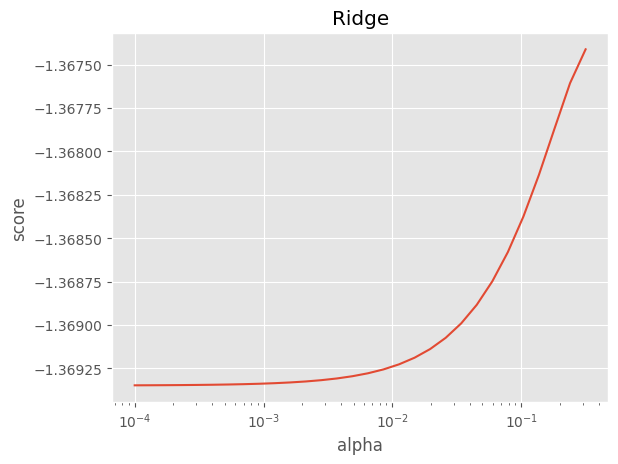

In [54]:
plt.figure()
plt.semilogx(alphas, scores) 
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

In [55]:
print("Mean Test Score: ",clf.cv_results_["mean_test_score"])
print("Standard Test Score: ",clf.cv_results_["std_test_score"])

Mean Test Score:  [-1.3693473  -1.36934694 -1.36934648 -1.36934586 -1.36934505 -1.36934398
 -1.36934257 -1.3693407  -1.36933824 -1.369335   -1.36933071 -1.36932506
 -1.36931762 -1.36930781 -1.36929491 -1.36927793 -1.36925564 -1.36922642
 -1.36918821 -1.36913839 -1.36907373 -1.36899027 -1.36888344 -1.36874821
 -1.36857974 -1.36837476 -1.36813424 -1.3678685  -1.3676064  -1.36741161]
Standard Test Score:  [0.18319222 0.1831923  0.18319241 0.18319254 0.18319272 0.18319296
 0.18319328 0.18319369 0.18319424 0.18319497 0.18319593 0.18319719
 0.18319887 0.18320108 0.18320401 0.18320788 0.18321301 0.1832198
 0.18322881 0.18324078 0.18325671 0.18327796 0.18330641 0.18334464
 0.18339628 0.18346647 0.18356265 0.1836957  0.1838818  0.18414546]


In [56]:
print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

Ridge Coef:  [ 2.22623003e-01  3.92822841e-01  6.35364281e-02  2.54387101e-01
  8.02494954e+00 -7.14086946e-02 -1.84742863e-01 -7.13069736e-02
 -1.82694017e-01  4.29403244e-01 -1.18023148e-01  7.68408036e-02
  7.05012159e-02 -4.21938618e-03  3.97819593e-02 -3.88526607e-02
  1.07344602e-01 -3.08829469e-02 -8.97113482e-03 -9.02489181e-02
 -1.04692959e-01 -5.99715690e-02 -1.42891617e-01  1.86953461e-01
 -5.56238657e-03  1.35586041e-01]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, random_state=49)


In [57]:
# best Ridge
ridge = Ridge(alpha=0.31622776601683794, random_state=49)
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)

print(f'R-sq: {ridge.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9814408199719598
rmse: 1.2363854760287636


In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=42, max_iter=10000) 
alphas = np.logspace(-4, -0.5, 30) 
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

Lasso Coef:  [ 1.63751542e-02  1.83171366e-01  0.00000000e+00  1.00279001e-01
  7.71213354e+00 -4.26161208e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  6.43687616e-01 -1.39088359e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.06336391e-02 -6.61895951e-03
  7.98516615e-02 -0.00000000e+00 -0.00000000e+00 -4.32747824e-02
 -4.40859062e-02 -2.56070997e-03 -7.02446909e-02  2.29518534e-01
  1.53803567e-02  1.58110807e-01]
Lasso Best Estimator:  Lasso(alpha=0.03423597957607583, max_iter=10000, random_state=42)


Text(0.5, 1.0, 'Lasso')

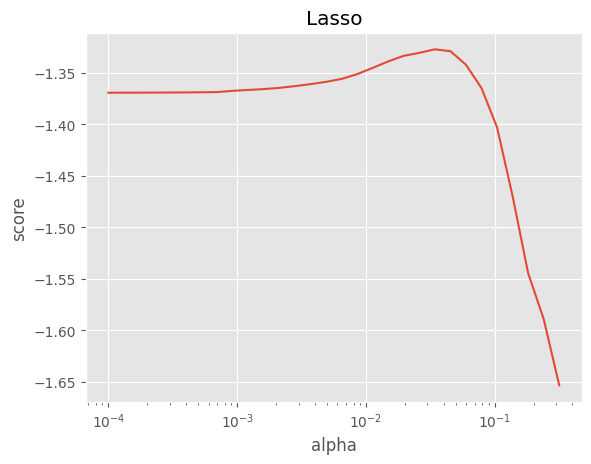

In [59]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [60]:
pred = clf.predict(X_test)

print(f'R-sq: {clf.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: -1.0792528698770552
rmse: 1.2779124088512652


In [61]:
# data seems to have correlated features
from sklearn.linear_model import ElasticNet
ENet = ElasticNet(random_state=49)
ENet.fit(X_train,y_train)
pred = ENet.predict(X_test)

print(f'R-sq: {ENet.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.8695843938324905
rmse: 3.2085644900114425


In [62]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [ 1.63751542e-02  1.83171366e-01  0.00000000e+00  1.00279001e-01
  7.71213354e+00 -4.26161208e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  6.43687616e-01 -1.39088359e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.06336391e-02 -6.61895951e-03
  7.98516615e-02 -0.00000000e+00 -0.00000000e+00 -4.32747824e-02
 -4.40859062e-02 -2.56070997e-03 -7.02446909e-02  2.29518534e-01
  1.53803567e-02  1.58110807e-01]
ElasticNet Best Estimator:  Lasso(alpha=0.03423597957607583, max_iter=10000, random_state=42)


In [63]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [64]:
pred = clf.predict(X_test)

print(f'R-sq: {clf.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: -1.0851684612241155
rmse: 1.2863422489093532


In [65]:
from sklearn import linear_model
glm = linear_model.PoissonRegressor(max_iter=10000)
glm.fit(X_train,y_train)
pred = glm.predict(X_test)

print(f'R-sq: {glm.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9924679894103995
rmse: 0.6846466007276548


In [66]:
import xgboost as xgb
gb = xgb.XGBRegressor()
gb.fit(X_train, y_train)
pred = gb.predict(X_test)

print(f'R-sq: {gb.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9999999744429118
rmse: 0.6068942023490488


In [67]:
gb.get_booster().get_score(importance_type='weight')

{'f0': 257.0,
 'f1': 202.0,
 'f2': 255.0,
 'f3': 239.0,
 'f4': 652.0,
 'f6': 4.0,
 'f7': 5.0,
 'f8': 3.0,
 'f10': 11.0,
 'f11': 9.0,
 'f12': 7.0,
 'f13': 3.0,
 'f14': 2.0,
 'f15': 3.0,
 'f16': 3.0,
 'f17': 4.0,
 'f18': 8.0,
 'f19': 27.0,
 'f20': 28.0,
 'f21': 41.0,
 'f22': 44.0,
 'f23': 14.0,
 'f24': 30.0,
 'f25': 11.0}

In [68]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

In [69]:
model_xgb = xgb.XGBRegressor()

In [70]:
clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

In [71]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:13:24] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:13:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:13:24] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/anshengmay/miniconda3/envs/mlenv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:13:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learne

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500, 1000], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             scoring='neg_mean_squared_error', verbose=True)

In [72]:
model_xgb = clf.best_estimator_
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [109]:
print(model_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)


In [73]:
pred = clf.predict(X_test)

print(f'R-sq: {clf.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: -0.0019436610713003918
rmse: 0.8768907055398267


In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(f'R-sq: {rf.score(X_train,y_train)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')


R-sq: 0.9998782960602429
rmse: 0.5610627326779004


In [79]:

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance

displacement     1.396112e-04
horsepower       4.087797e-04
weight           1.168704e-04
acceleration     5.642796e-04
log_mpg          9.983690e-01
cylinders_3      1.942576e-07
cylinders_4      1.108109e-05
cylinders_5      2.049500e-06
cylinders_6      7.224435e-06
cylinders_8      7.413724e-07
origin_1         4.086609e-06
origin_2         1.066120e-04
origin_3         2.579323e-05
model year_70    8.871414e-05
model year_71    1.127974e-06
model year_72    1.248048e-06
model year_73    7.320972e-06
model year_74    7.788670e-07
model year_75    3.306047e-06
model year_76    1.142614e-05
model year_77    5.476902e-06
model year_78    5.419154e-05
model year_79    9.047555e-06
model year_80    4.955282e-05
model year_81    9.603125e-06
model year_82    1.846398e-06
dtype: float64

In [83]:
from sklearn.base import clone
# Average of Models
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [84]:
averaged_models = AveragingModels(models = (model_xgb, glm))
averaged_models.fit(X_train, y_train)

In [87]:
from sklearn.metrics import r2_score
pred = averaged_models.predict(X_test)

print(f'R-sq: {r2_score(y_test, pred)}\nrmse: {np.sqrt(mean_squared_error(pred, y_test))}')

R-sq: 0.9930473722844467
rmse: 0.7247849757848321


# pytorch

In [93]:
import torch
import torch.nn as nn

In [90]:
data = pd.read_csv("auto-mpg.csv")
data.columns
data.dropna()
data.reset_index(drop=True)
data["horsepower"] = data["horsepower"].replace("?", "0")
data["horsepower"] = data["horsepower"].astype(float)

In [91]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name']
numeric_cols = [ 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']

In [96]:
df_train, df_test = train_test_split(data, train_size=0.8, random_state=1)

In [97]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

In [99]:
train_stats = df_train.describe().transpose()
for col_name in numeric_cols:
    mean = train_stats.loc[col_name, 'mean']
    std = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean) / std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean) / std
df_train_norm.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,-0.842931,-0.500222,-0.383841,-0.193720,-0.042737,82,1,ford mustang gl
255,25.1,-0.842931,-0.500222,-0.333888,-0.277402,-0.115412,78,1,ford fairmont (man)
72,15.0,1.534472,1.104280,1.214672,1.123673,-1.169204,72,1,amc matador (sw)
235,26.0,-0.842931,-0.920915,-0.658586,-0.821335,0.902042,77,3,toyota corolla liftback
37,18.0,0.345770,0.399864,-0.034166,0.401617,-0.079074,71,1,amc matador


In [100]:
boundaries = torch.tensor([73, 76, 79])
v = torch.tensor(df_train_norm['model year'].values)
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)
v = torch.tensor(df_test_norm['model year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)
numeric_cols.append('Model Year Bucketed')

In [101]:
from torch.nn.functional import one_hot

total_origin = len(set(df_train_norm['origin']))
origin_encoded = one_hot(torch.from_numpy(df_train_norm['origin'].values) % total_origin)
x_train_numeric = torch.tensor(df_train_norm[numeric_cols].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()
origin_encoded = one_hot(torch.from_numpy(df_test_norm['origin'].values) % total_origin)
x_test_numeric = torch.tensor(df_test_norm[numeric_cols].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

In [102]:
y_train = torch.tensor(df_train_norm['mpg'].values).float()
y_test = torch.tensor(df_test_norm['mpg'].values).float()

In [104]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 8
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [105]:
import torch.nn as nn
hidden_units = [16, 8, 4]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)
model


Sequential(
  (0): Linear(in_features=9, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=1, bias=True)
)

In [106]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [107]:
num_epochs = 400
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss_hist_train/len(train_dl):.4f}')

Epoch 0 Loss 586.8754
Epoch 20 Loss 8.9732
Epoch 40 Loss 8.0455
Epoch 60 Loss 7.5684
Epoch 80 Loss 7.5135
Epoch 100 Loss 8.4799
Epoch 120 Loss 6.5182
Epoch 140 Loss 6.4072
Epoch 160 Loss 6.5931
Epoch 180 Loss 5.6874
Epoch 200 Loss 5.6242
Epoch 220 Loss 5.7172
Epoch 240 Loss 6.0138
Epoch 260 Loss 5.1596
Epoch 280 Loss 5.4117
Epoch 300 Loss 4.9520
Epoch 320 Loss 4.8522
Epoch 340 Loss 4.8754
Epoch 360 Loss 4.9413
Epoch 380 Loss 4.9417


In [108]:
with torch.no_grad():
    pred = model(x_test.float())[:, 0]
    loss = loss_fn(pred, y_test)
    print(f'Test MSE: {loss.item():.4f}')
    print(f'Test MAE: {nn.L1Loss()(pred, y_test).item():.4f}')

Test MSE: 6.0555
Test MAE: 1.9094
